In [2]:
DATA_DIR_BASE = "/scratch/cmpe258-sp25/group3_styletransfer/"
COCO_UNLABLED = DATA_DIR_BASE + "unlabeled2017/unlabeled2017/"
ART_STYLE = DATA_DIR_BASE + "wikiart/"

In [3]:
from torchvision.models import vgg19, VGG19_Weights
import torch
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)
print(f"default device: {torch.get_default_device()}")

default device: cuda:0


In [4]:
import losses as loss
import data_feat_load as dfl
import train

In [5]:
vgg = vgg19(weights='VGG19_Weights.IMAGENET1K_V1').features.to(device).eval()
# Extract intermediate layers for content & style
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']


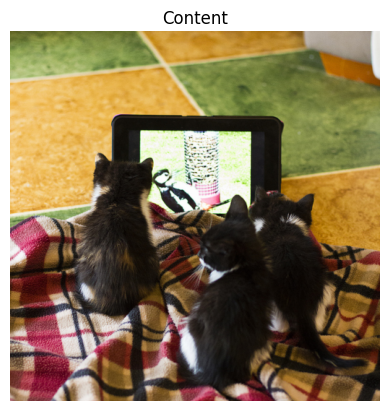

In [6]:
content_img = f"{COCO_UNLABLED}/000000160675.jpg"
content = dfl.load_image(content_img,dfl.get_transforms(dfl.IMG_SIZE),device)
dfl.imshow(content, "Content")


Style image: /scratch/cmpe258-sp25/group3_styletransfer/wikiart//Post_Impressionism/constantine-maleas_olympia.jpg


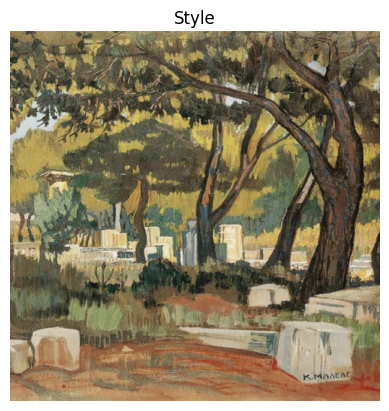

In [7]:
style_img= f"{ART_STYLE}/Post_Impressionism/constantine-maleas_olympia.jpg"
style = dfl.load_image(style_img,dfl.get_transforms(dfl.IMG_SIZE),device)
dfl.imshow(style, "Style")
print("Style image:", style_img)

Step [0/5000]  Total Loss: 11066648.00  Elapsed Time: 0.07s
Step [100/5000]  Total Loss: 101704.36  Elapsed Time: 6.96s
Step [200/5000]  Total Loss: 53569.10  Elapsed Time: 13.86s
Step [300/5000]  Total Loss: 38793.64  Elapsed Time: 20.77s
Step [400/5000]  Total Loss: 31750.56  Elapsed Time: 27.70s
Step [500/5000]  Total Loss: 27445.96  Elapsed Time: 34.64s
Step [600/5000]  Total Loss: 24721.60  Elapsed Time: 41.59s
Step [700/5000]  Total Loss: 23485.02  Elapsed Time: 48.54s
Step [800/5000]  Total Loss: 23114.17  Elapsed Time: 55.50s
Step [900/5000]  Total Loss: 19285.11  Elapsed Time: 62.46s
Step [1000/5000]  Total Loss: 18078.39  Elapsed Time: 69.42s
Step [1100/5000]  Total Loss: 18696.04  Elapsed Time: 76.37s
Step [1200/5000]  Total Loss: 17929.60  Elapsed Time: 83.33s
Step [1300/5000]  Total Loss: 15997.11  Elapsed Time: 90.29s
Step [1400/5000]  Total Loss: 18039.04  Elapsed Time: 97.24s
Step [1500/5000]  Total Loss: 14207.94  Elapsed Time: 104.20s
Step [1600/5000]  Total Loss: 138

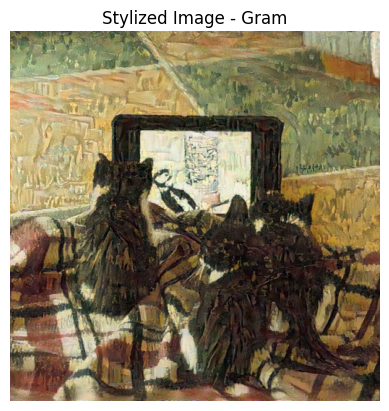

In [13]:
output = train.style_transfer(content, style, vgg, steps=5000, stop_threshold=10000,layers=style_layers,loss_method="gram")
dfl.imshow(output, "Stylized Image - Gram")

Step [0/500]  Total Loss: 9.65  Elapsed Time: 0.07s
Step [100/500]  Total Loss: 0.54  Elapsed Time: 7.02s
Step [200/500]  Total Loss: 0.47  Elapsed Time: 13.98s
Step [300/500]  Total Loss: 0.44  Elapsed Time: 20.94s
Step [400/500]  Total Loss: 0.42  Elapsed Time: 27.92s
Style transfer completed in 34.83 seconds.


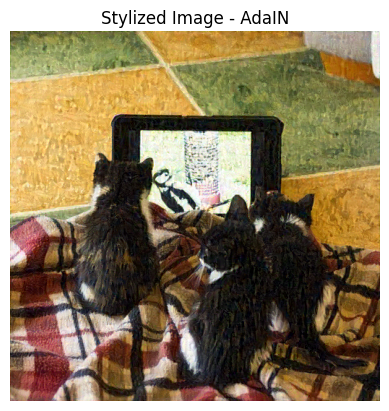

In [12]:
vgg = vgg19(weights='VGG19_Weights.IMAGENET1K_V1').features.to(device).eval()
# Extract intermediate layers for content & style
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']
output = train.style_transfer(content, style, vgg, steps=500, style_weight=10.0, stop_threshold=0,layers=style_layers,loss_method="adain")
dfl.imshow(output, "Stylized Image - AdaIN")

Step [0/500]  Total Loss: 9.44  Elapsed Time: 0.07s
Step [100/500]  Total Loss: 0.33  Elapsed Time: 7.05s
Step [200/500]  Total Loss: 0.28  Elapsed Time: 14.04s
Step [300/500]  Total Loss: 0.25  Elapsed Time: 21.03s
Step [400/500]  Total Loss: 0.24  Elapsed Time: 28.04s
Style transfer completed in 34.98 seconds.


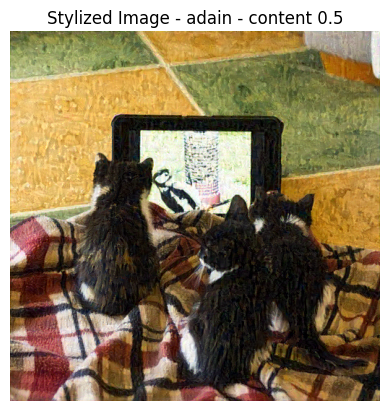

In [16]:
vgg = vgg19(weights='VGG19_Weights.IMAGENET1K_V1').features.to(device).eval()
# Extract intermediate layers for content & style
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']
loss_method = "adain"
stop_threshold = 0
style_weight = 10
steps = 500
content_weight = .5
output = train.style_transfer(content, style, vgg, content_weight=content_weight, steps=steps, style_weight=style_weight, stop_threshold=stop_threshold,layers=style_layers,loss_method=loss_method)
dfl.imshow(output, f"Stylized Image - {loss_method} - content {content_weight}")

In [ ]:
vgg = vgg19(weights='VGG19_Weights.IMAGENET1K_V1').features.to(device).eval()
# Extract intermediate layers for content & style
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']
loss_method = "gram"
stop_threshold = 10000
style_weight = 1e6
steps = 5000
content_weight = .5
output = train.style_transfer(content, style, vgg, content_weight=content_weight, steps=steps, style_weight=style_weight, stop_threshold=stop_threshold,layers=style_layers,loss_method=loss_method)
dfl.imshow(output, f"Stylized Image - {loss_method} - content {content_weight}")

Step [0/5000]  Total Loss: 11066648.00  Elapsed Time: 0.07s
Step [100/5000]  Total Loss: 101687.81  Elapsed Time: 7.01s
Step [200/5000]  Total Loss: 53561.95  Elapsed Time: 13.96s
Step [300/5000]  Total Loss: 38818.52  Elapsed Time: 20.91s
Step [400/5000]  Total Loss: 31854.16  Elapsed Time: 27.87s
Step [500/5000]  Total Loss: 27487.79  Elapsed Time: 34.83s


## Rococo

Style image: /scratch/cmpe258-sp25/group3_styletransfer/wikiart//Rococo/allan-ramsay_lady-holland-1766.jpg
Step [0/5000]  Total Loss: 8404408.00
Step [100/5000]  Total Loss: 274130.34
Step [200/5000]  Total Loss: 93208.38
Step [300/5000]  Total Loss: 52216.35
Step [400/5000]  Total Loss: 37147.58
Step [500/5000]  Total Loss: 29130.00
Step [600/5000]  Total Loss: 24097.02
Step [700/5000]  Total Loss: 20622.27
Step [800/5000]  Total Loss: 18236.95
Step [900/5000]  Total Loss: 16429.77
Step [1000/5000]  Total Loss: 14928.60
Step [1100/5000]  Total Loss: 13977.94
Step [1200/5000]  Total Loss: 14799.80
Step [1300/5000]  Total Loss: 12173.40
Step [1400/5000]  Total Loss: 11166.15
Step [1500/5000]  Total Loss: 10465.47
Stopping early at step 1559, total loss = 9990.25
time taken: 1.802 mins


NameError: name 'imshow' is not defined

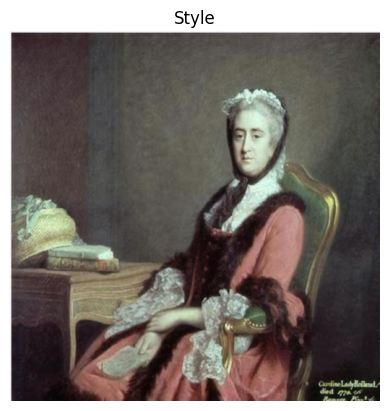

In [33]:
style_img= f"{ART_STYLE}/Rococo/allan-ramsay_lady-holland-1766.jpg"
style = dfl.load_image(style_img,dfl.get_transforms(dfl.IMG_SIZE),device)
dfl.imshow(style, "Style")
print("Style image:", style_img)

output = style_transfer(content, style, vgg, steps=5000, stop_threshold=10000)
dfl.imshow(output, "Stylized Image")

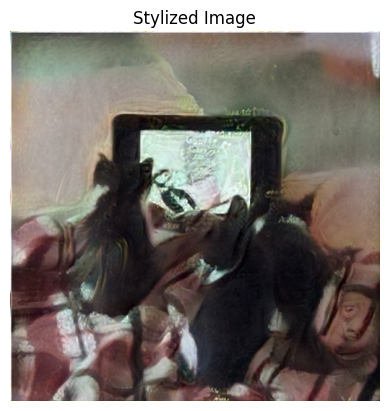

In [31]:
!ls /scratch/cmpe258-sp25/group3_styletransfer/wikiart/Rococo/

 allan-ramsay_charlotte-sophia-of-mecklenburg-strelitz-1762.jpg
 allan-ramsay_general-sir-james-abercromby-also-spelled-abercrombie.jpg
 allan-ramsay_george-iii.jpg
 allan-ramsay_hon-mary-townshend-the-daughter-of-charles-townshend-2nd-viscount-townshend-of-raynham-and.jpg
 allan-ramsay_jean-jacques-rousseau.jpg
 allan-ramsay_john-campbell-4th-earl-of-loudoun.jpg
 allan-ramsay_john-manners-marquess-of-granby-1745.jpg
 allan-ramsay_john-reid.jpg
 allan-ramsay_king-george-iii.jpg
 allan-ramsay_lady-holland-1766.jpg
 allan-ramsay_lady-susan-fox-strangways-1761.jpg
 allan-ramsay_mary-digges-1737-1829-lady-robert-manners.jpg
 allan-ramsay_miss-craigie-1741.jpg
 allan-ramsay_norman-the-red-man-22nd-chief-of-macleod.jpg
 allan-ramsay_nude-study-of-a-striding-man-with-stone-sling.jpg
 allan-ramsay_philip-dormer-stanhope-4th-earl-of-chesterfield.jpg
 allan-ramsay_portrait-of-agnes-murray-kynnynmond.jpg
 allan-ramsay_portrait-of-a-naval-officer.jpg
 allan-ramsay_portrait-of-anne-brown.jpg
 allan

## Dataset Exploration

In [39]:
import glob
import cv2
threads = int(cpu_count()/16) # 16 on g17 hpc
files = glob.glob(COCO_UNLABLED + "*")
sizes = []
from multiprocessing import Pool, cpu_count

In [45]:
def get_size_cv(path):
    img = cv2.imread(path)
    if img is not None:
        h, w = img.shape[:2]
        return (w, h)
    return None

In [46]:
sizes_wiki = []
art_files = glob.glob(ART_STYLE+"**/*")
with Pool(threads) as p:
    sizes_wiki = p.map(get_size_cv, art_files)

In [ ]:
with Pool(threads) as p:
    sizes = p.map(get_size_cv, files)

In [62]:
import numpy as np
sz_arr = np.array(sizes)
art_sz_arr = np.array(sizes_wiki)

In [63]:
np.median(sz_arr[:,0]),np.median(sz_arr[:,1]),np.median(art_sz_arr[:,0]),np.median(art_sz_arr[:,1]),

(640.0, 480.0, 1382.0, 1492.0)

In [64]:
np.min(sz_arr[:,0]),np.min(sz_arr[:,1]),np.min(art_sz_arr[:,0]),np.min(art_sz_arr[:,1]),

(75, 67, 1381, 1381)

In [65]:
np.max(sz_arr[:,0]),np.max(sz_arr[:,1]),np.max(art_sz_arr[:,0]),np.max(art_sz_arr[:,1]),

(640, 640, 15754, 17768)

In [74]:
128*2

256